# Exercise 1 - week 4

For this exercise, we are going to experiment with __Principal Component Analysis(PCA)__ for dimensionreduction and visualization. In this exercise we will be using "Handwritten Digits" from scikit-learn, which are scanned pictures of numbers written from 0 to 9





## Qa) Load the data and make a short data analysis(plot som examples)



In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# The digits dataset
digits = datasets.load_digits()
X,y = datasets.load_digits(return_X_y=True)
lenofDig=(len(X))
print("Length of X in digits: ", lenofDig)
#print(digits)
print("\nX ", X)
print("\ny: ",y)
    
# show images of digits
print("\n\nPrinting the pixel images:")
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:10], digits.target[0:10])):
    plt.subplot(1, 10, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray_r)
    plt.title('Training: %i\n' % label, fontsize = 20)
    
#split data into training and test
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)




Length of X in digits:  1797

X  [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]

y:  [0 1 2 ... 8 9 8]


Printing the pixel images:


In [2]:
# to perform a PCA, its best to normalize or data.
def get_normed_mean_cov(X):
    X_std = StandardScaler().fit_transform(X)
    X_mean = np.mean(X_std, axis=0)
    
    ## Automatic:
    #X_cov = np.cov(X_std.T)
    
    # Manual:
    X_cov = (X_std - X_mean).T.dot((X_std - X_mean)) / (X_std.shape[0]-1)
    
    return X_std, X_mean, X_cov

X_std, X_mean, X_cov = get_normed_mean_cov(x_train)
X_std_validation, _, _ = get_normed_mean_cov(x_test)

print("Standard deviation for X: \n",X_std)
print("\nMean value for X: \n",X_mean)
print("\nCross covariance for X: \n",X_cov)


Standard deviation for X: 
 [[ 0.          2.85610953  1.62260165 ...  0.89887909  1.74648816
   0.38393236]
 [ 0.         -0.33833791 -0.88123922 ...  1.06879069 -0.25013357
  -0.18751172]
 [ 0.         -0.33833791 -0.255279   ...  0.38914426 -0.49971129
  -0.18751172]
 ...
 [ 0.         -0.33833791 -0.04662559 ... -1.14006023 -0.49971129
  -0.18751172]
 [ 0.         -0.33833791 -0.255279   ... -1.14006023 -0.49971129
  -0.18751172]
 [ 0.         -0.33833791  0.16202781 ...  0.72896748 -0.49971129
  -0.18751172]]

Mean value for X: 
 [ 0.00000000e+00 -1.90477016e-16 -5.15755054e-17 -4.94531414e-17
 -1.87097718e-16  8.46885047e-17  2.17635033e-16  1.62226909e-16
  2.16872631e-16  2.37210235e-16 -1.30721137e-16 -2.07703194e-17
  7.55808845e-17  6.11570515e-17  2.66387588e-16 -3.80603740e-16
 -9.80923665e-17  2.20890698e-17  3.79964970e-17 -7.64875254e-17
 -1.12670741e-16  4.93707195e-17 -1.97647722e-16 -1.97194401e-17
 -5.05972604e-16  1.03521909e-16 -8.68726851e-17  5.72008002e-17
  7.

#### Note on normalisation:
By normalizing we set the Mean value of the data to 0 and the varriation of the data ro 1. This makes it easer to compare with other datasets in the future.

The dimention corresponding to 95% explained varriance=  39


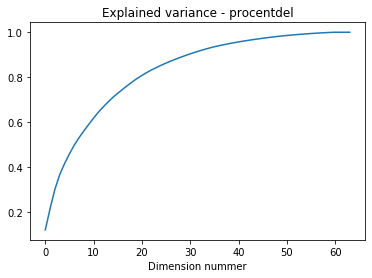

In [3]:
pca = PCA().fit(X_std)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_))
plt.title('Explained variance - procentdel')
plt.xlabel('Dimension nummer')

functionArray=(np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_))

#Findind the optimal dimention
above95Indexes = np.where(functionArray>0.95)
dimension=above95Indexes[0][0]
print("The dimention corresponding to 95% explained varriance= ",dimension)

In [4]:
# PCA fit
pca = PCA(n_components=dimension)
pca.fit(X_std)

# principale akser
pc = pca.components_
#print(pc[0])


# varianser og standard afvigelser (længde af akser)
varians1 = pca.explained_variance_
s1 = np.sqrt(varians1)
print('\nVariance = \n',varians1)
print("\nStandart deviation= \n", s1)
      
# Udtrukket middelværdi
m1 = pca.mean_
print('\nMean = \n',m1)



Variance = 
 [7.45230186 5.82566561 5.23183217 3.98382544 2.97956806 2.60160842
 2.39150396 2.01714931 1.84747592 1.75210146 1.69037112 1.61501838
 1.41819275 1.34549154 1.25000334 1.10529322 1.05915899 1.02593645
 0.99114258 0.93012135 0.82360572 0.78600728 0.71051017 0.65287282
 0.62121185 0.57545091 0.56537324 0.51262984 0.49361989 0.47935023
 0.45969246 0.42632747 0.40761062 0.38832656 0.35915949 0.34192895
 0.28878867 0.27431755 0.26084241]

Standart deviation= 
 [2.72989045 2.41364157 2.28731987 1.99595226 1.72614254 1.61295022
 1.54644882 1.42026382 1.35921887 1.32366969 1.30014273 1.27083374
 1.19087898 1.15995325 1.11803548 1.05132926 1.0291545  1.01288521
 0.99556144 0.96442799 0.90752725 0.88657051 0.84291766 0.80800546
 0.78816994 0.75858481 0.75191306 0.71598173 0.70258088 0.69235124
 0.67800624 0.65293757 0.63844391 0.62315853 0.59929917 0.58474691
 0.53739061 0.52375333 0.51072733]

Mean = 
 [ 0.00000000e+00 -1.90477016e-16 -5.15755054e-17 -4.94531414e-17
 -1.87097718e-

#### Note on PCA:


## Qb) Plot the various digits in 2D after PCA dimensionreduction

Text(0.5, 0, 'Dimension nummer')

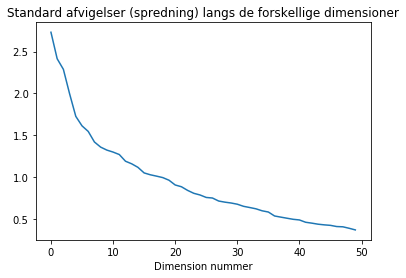

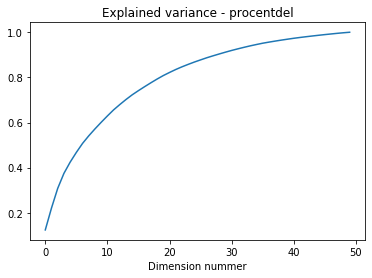

In [5]:
#%% Fit PCA

pca2 = PCA(n_components=dimension)  # medtager alle komponenter på til 95% explained varriance
pca2.fit(X_std)

v1 = pca2.components_

s1 = np.sqrt(pca2.explained_variance_) # OBS: Relater til Dmat..
plt.plot(s1)
plt.title('Standard afvigelser (spredning) langs de forskellige dimensioner')
plt.xlabel('Dimension nummer')

plt.figure()
plt.plot(np.cumsum(pca2.explained_variance_)/np.sum(pca2.explained_variance_))
plt.title('Explained variance - procentdel')
plt.xlabel('Dimension nummer')


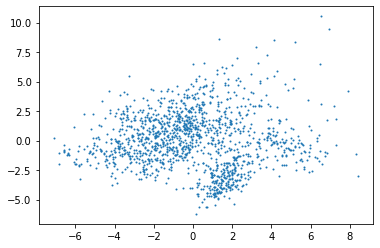

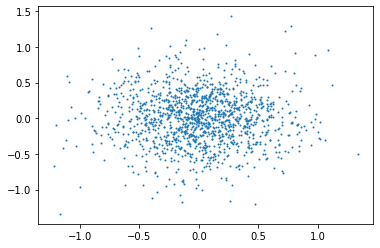

In [6]:
#%% Projektion på 2D til visualisering

# Alternativ : Brug fit_transform eller transform direkte..
v2d = v1[:2,:] # to første comp
X2proj = X_std @ v2d.T
plt.scatter(X2proj[:,0], X2proj[:,1], s=1) # Læg mærke til standard afvigelserne..


v2d2 = v1[48:,:] # to sidste comp
X2proj2 = X_std @ v2d2.T
plt.figure()
plt.scatter(X2proj2[:,0], X2proj2[:,1], s=1)